In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the 2 files to clean and merge

df = pd.read_csv('../data/Crime_Data_from_2010_to_2019.csv') 
df2 = pd.read_csv('../data/Crime_Data_from_2020_to_Present.csv')

In [3]:
#now merging the two dataframes 

df1 = pd.concat([df,df2] , ignore_index=True)

In [4]:
#starting the processing of the first file 

df1.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA'],
      dtype='object')

In [5]:
# Keeping only the columns that I need
# and renaming them

col_list = ['DATE OCC','AREA NAME','Crm Cd',
            'Crm Cd Desc','Vict Age', 'Vict Sex', 
            'Vict Descent','Weapon Used Cd','Weapon Desc','Premis Cd','Premis Desc','LAT', 'LON']      

df1 = df1[col_list]

df1.columns = ['Date','Area','Crime Code','Crime','Vict Age', 'Vict Sex',   
            'Vict Descent','Weapon Code','Weapon','Premises Code','Premises','LAT', 'LON']       

In [6]:
df1.head()

,Date,Area,Crime Code,Crime,Vict Age,Vict Sex,Vict Descent,Weapon Code,Weapon,Premises Code,Premises,LAT,LON
0,02/20/2010 12:00:00 AM,Newton,900,VIOLATION OF COURT ORDER,48,M,H,NaN,NaN,501.0,SINGLE FAMILY DWELLING,33.9825,-118.2695
1,09/12/2010 12:00:00 AM,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,NaN,NaN,101.0,STREET,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,NaN,NaN,103.0,ALLEY,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,102.0,HAND GUN,101.0,STREET,34.1016,-118.3295
4,01/02/2010 12:00:00 AM,Central,122,"RAPE, ATTEMPTED",47,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",103.0,ALLEY,34.0387,-118.2488


In [7]:
df1['Date'] = pd.to_datetime(df1['Date'])   #converting Date to datetime

In [8]:
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year
                                                    #creating new columns : Year, Month
year = df1['Year']
month = df1['Month']
df1 = df1.drop(columns=['Date','Year','Month'])
df1.insert(loc=0, column='Month', value=month)
df1.insert(loc=0, column='Year', value=year)

In [9]:
df1 = df1.sort_values(by=['Year','Month'])

In [10]:
df1.head()

,Year,Month,Area,Crime Code,Crime,Vict Age,Vict Sex,Vict Descent,Weapon Code,Weapon,Premises Code,Premises,LAT,LON
3,2010,1,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,102.0,HAND GUN,101.0,STREET,34.1016,-118.3295
4,2010,1,Central,122,"RAPE, ATTEMPTED",47,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",103.0,ALLEY,34.0387,-118.2488
5,2010,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,B,NaN,NaN,404.0,DEPARTMENT STORE,34.0480,-118.2577
6,2010,1,Central,330,BURGLARY FROM VEHICLE,46,M,H,NaN,NaN,101.0,STREET,34.0389,-118.2643
7,2010,1,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,M,B,500.0,UNKNOWN WEAPON/OTHER WEAPON,710.0,OTHER PREMISE,34.0435,-118.2427


In [11]:
df1['Vict Sex'].unique(), df1['Vict Descent'].unique() #unique values of the columns to find all types

(array(['F', 'M', nan, 'X', 'H', '-', 'N'], dtype=object),
 array(['W', 'H', 'B', 'A', 'O', nan, 'K', 'X', 'I', 'C', 'P', 'F', 'S',
        'J', 'G', 'U', 'V', 'Z', 'D', 'L', '-'], dtype=object))

In [12]:
#finding the prevalent Descents and Sexes

df1['Vict Descent'].value_counts() , df1['Vict Sex'].value_counts() 

(H    827211
 W    580254
 B    382586
 O    229313
 X    108046
 A     58155
 K     10689
 F      3565
 C      1870
 I      1154
 J       748
 V       447
 P       409
 U       237
 Z       223
 G       110
 S        45
 D        39
 L        29
 -         3
 Name: Vict Descent, dtype: int64,
 M    1114497
 F    1008557
 X      82006
 H        107
 N         17
 -          1
 Name: Vict Sex, dtype: int64)

In [13]:
#changing types of Descent and Sex to a more suitable way of reading them
#also grouping as other the non-prevalent ones

df1['Vict Sex'].mask(((df1['Vict Sex'] != 'M') & (df1['Vict Sex'] != 'F' )), 'Other', inplace=True)

df1['Vict Sex'] = df1['Vict Sex'].replace(['M', 'F'],
                                        ['Male','Female'])

df1['Vict Descent'].mask(((df1['Vict Descent'] != 'W') & (df1['Vict Descent'] != 'B') & (df1['Vict Descent'] != 'H')
                            & (df1['Vict Descent'] != 'A') & (df1['Vict Descent'] != 'O') & (df1['Vict Descent'] != 'X')),
                        'Other', inplace=True)

df1['Vict Descent'] = df1['Vict Descent'].replace(['H','W','B','O','X','A'],
                                        ['Hispanic','White','Black','Unknown','Unknown','Asian'])

In [14]:
df1.head()

,Year,Month,Area,Crime Code,Crime,Vict Age,Vict Sex,Vict Descent,Weapon Code,Weapon,Premises Code,Premises,LAT,LON
3,2010,1,Hollywood,900,VIOLATION OF COURT ORDER,47,Female,White,102.0,HAND GUN,101.0,STREET,34.1016,-118.3295
4,2010,1,Central,122,"RAPE, ATTEMPTED",47,Female,Hispanic,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",103.0,ALLEY,34.0387,-118.2488
5,2010,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,Male,Black,NaN,NaN,404.0,DEPARTMENT STORE,34.0480,-118.2577
6,2010,1,Central,330,BURGLARY FROM VEHICLE,46,Male,Hispanic,NaN,NaN,101.0,STREET,34.0389,-118.2643
7,2010,1,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,Male,Black,500.0,UNKNOWN WEAPON/OTHER WEAPON,710.0,OTHER PREMISE,34.0435,-118.2427


In [15]:
df1['Vict Age'].unique()

array([ 47,  23,  46,  51,  30,  55,  38,  40,  24,  29,  41,  11,  50,
        18,  37,  28,  25,  31,  36,  61,  43,  35,  32,  26,  27,   0,
        56,  57,  42,  49,  34,  39,  22,  54,  60,  99,  21,  20,  74,
        16,  44,  17,  33,  48,  63,  52,  19,  45,  59,  53,  58,  84,
        68,  82,  62,  66,  65,  64,  14,  69,  13,  15,   4,  12,   9,
         3,   7,  71,   8,  79,  67,  76,   2,  10,   6,  72,  80,  86,
        75,  73,  89,  85,   5,  77,  81,  78,  96,  88,  70,  87,  91,
        90,  92,  83,  97,  95,  98,  94,  93,  -1,  -2,  -3,  -4,  -6,
        -9,  -8, -11, -10,  -5,  -7, 114, 118, 120], dtype=int64)

In [16]:
#misleading age values such as negative ones have to be dropped

df1['Analysis'] = np.where(((df1['Vict Age'] > 0) & (df1['Vict Age'] < 100)),'kept', 'dropped')

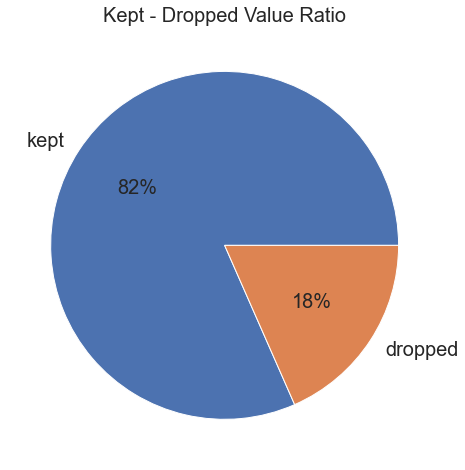

In [17]:
sns.set(style='ticks')
plt.figure(figsize=[8,8])

plt.pie(df1['Analysis'].value_counts(), labels = df1['Analysis'].value_counts().index, 
         autopct='%.0f%%',textprops = {'fontsize':20})
plt.title('Kept - Dropped Value Ratio', fontsize = 20)
plt.show()

In [18]:
#I will keep all the people aged from 1 to 99 years old

df1 = df1[((df1['Vict Age'] > 0) & (df1['Vict Age'] < 100))]

In [19]:
df1.drop('Analysis', axis = 1, inplace = True)

In [20]:
df1 = df1[df1['Vict Sex'] == 'Female']

In [21]:
df1.drop('Vict Sex', axis = 1, inplace = True)

In [22]:
df1.shape


(994309, 13)

In [23]:
#saving the cleaned file for my analysis

df1.to_csv('../data/Crime_Data_from_2010_to_Present(cleaned).csv')